## Final Project

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib
# Make plots appear in notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib as mpl

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline

np.random.seed(42)
import sklearn.metrics
import sklearn.neighbors
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv("Housing.csv")
print(df.shape)

df.isnull().sum()

(20640, 10)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [33]:
df.head(50)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [34]:
df2 = df.dropna()
df2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [35]:
# Enconding categorical variables
import category_encoders as ce
t_df = df2

#One hot encoding for variables: Race
ocean_encoder=ce.OneHotEncoder(cols='ocean_proximity',handle_unknown='return_nan',return_df=True,use_cat_names=True)
t_df = ocean_encoder.fit_transform(t_df)
t_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_NEAR BAY,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0.0,0.0,1.0,0.0,0.0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0.0,0.0,1.0,0.0,0.0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0.0,0.0,1.0,0.0,0.0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0.0,0.0,1.0,0.0,0.0


# (2)
* exploratory analysis and data visulization

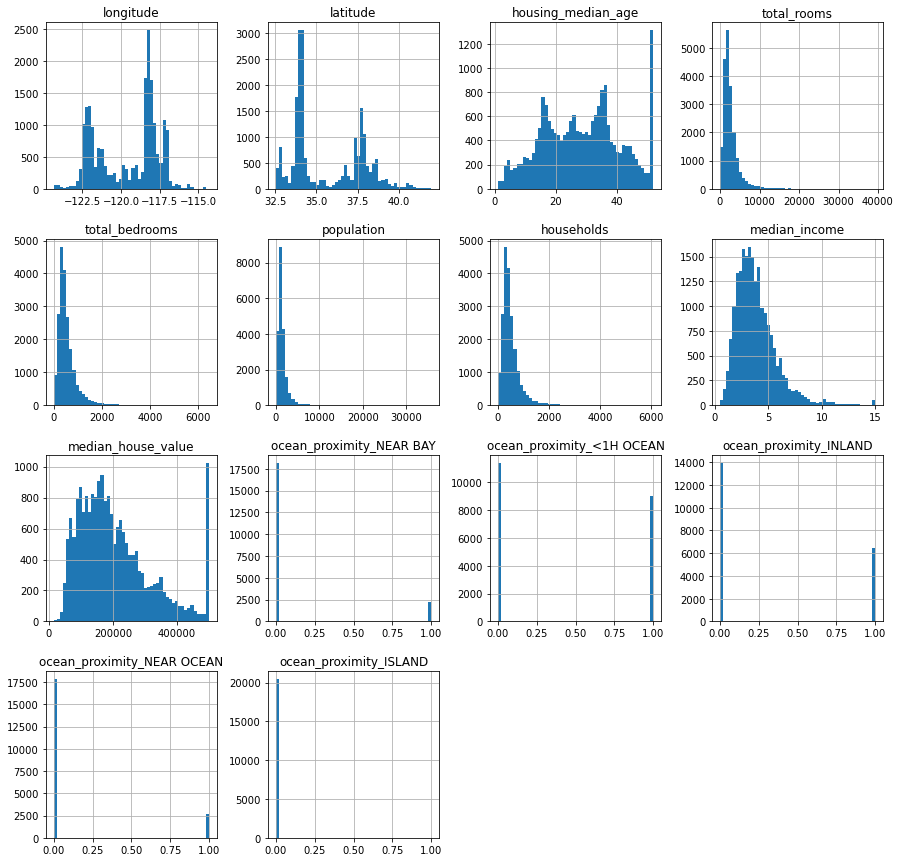

In [36]:
t_df.hist(bins = 50, figsize = (15,15))
plt.show()

In [37]:
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()

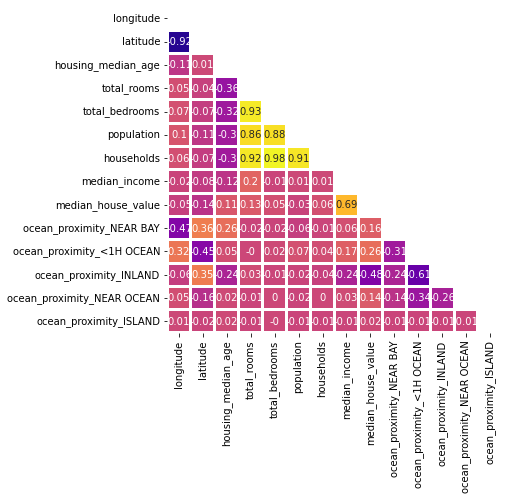

In [38]:
corrMat(t_df)

In [39]:
X = t_df.drop('median_income',axis=1)
y = t_df['median_income']

In [40]:
X.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_house_value            0
ocean_proximity_NEAR BAY      0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_NEAR OCEAN    0
ocean_proximity_ISLAND        0
dtype: int64

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
cvf = ShuffleSplit(n_splits=100, test_size=0.25)
scores = cross_val_score(dtr, X, y, cv=cvf)
print(np.mean(scores))

0.5392410758780859


In [42]:
X_trainValid, X_test, y_trainValid, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Try decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
nmc = 100
#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_depth':[5,10,15,20]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.25,n_splits=nmc)
# set up search
grid_search=GridSearchCV(DecisionTreeRegressor(),param_grid,cv=cvf,return_train_score=True,n_jobs=-1)
# implement search
grid_search.fit(X_trainValid,y_trainValid)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','mean_train_score','param_max_depth']])

# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

   rank_test_score  mean_test_score  mean_train_score param_max_depth
0                2         0.554157          0.586100               5
1                1         0.605379          0.825784              10
2                3         0.547001          0.963480              15
3                4         0.525134          0.996955              20
best param: {'max_depth': 10}
best model: DecisionTreeRegressor(max_depth=10)
best test score: 0.6053785508347359


In [45]:
best_model = grid_search.best_estimator_

shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
CVInfo = cross_validate(best_model, X_trainValid, y_trainValid, cv=shuffle,return_train_score=True,n_jobs=-1)

print("Best Model Result:")
print('trian score:', np.mean(CVInfo['train_score']))
print('test score:', np.mean(CVInfo['test_score']))

print("Final test sample:")
best_model.fit(X_trainValid,y_trainValid)
print(best_model.score(X_test,y_test))

Best Model Result:
trian score: 0.8255178699922545
test score: 0.6020301006478767
Final test sample:
0.6413345319320254


# Ridge

In [46]:
fullModel = make_pipeline(MinMaxScaler(),Ridge())
#fullModel.fit(Xs,y)
param_grid={'ridge__alpha':[0.0001,0.001,0.01,0.05,0.1,0.25,0.5,1, 2,  5., 10., 100., 250., 500., 1000.]}
shuffle = ShuffleSplit(n_splits=100, test_size=0.25)
grid_search=GridSearchCV(fullModel,param_grid,cv=shuffle,
                              return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_ridge__alpha']])

print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

# This is best model
best_model = grid_search.best_estimator_

    rank_test_score  mean_test_score param_ridge__alpha
0                 3         0.662774             0.0001
1                 2         0.662775              0.001
2                 1         0.662781               0.01
3                 4         0.662769               0.05
4                 5         0.662675                0.1
5                 6         0.662014               0.25
6                 7         0.660173                0.5
7                 8         0.655361                  1
8                 9         0.644845                  2
9                10         0.618395                5.0
10               11         0.591792               10.0
11               12         0.526528              100.0
12               13         0.492706              250.0
13               14         0.440478              500.0
14               15         0.359932             1000.0
best param: {'ridge__alpha': 0.01}
best model: Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('ridge

In [52]:
nmc = 250
alphas = np.array([0.0001,0.001,0.01, 0.1])
shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
for a in alphas:
    fullModel = make_pipeline(StandardScaler(), Lasso(alpha=a))
    CVInfo = cross_validate(fullModel, X, y, cv=shuffle,return_train_score=True,n_jobs=10)
    print("Alpha=",a)
    print(np.mean(CVInfo['train_score']))
    print(np.mean(CVInfo['test_score']))

Alpha= 0.0001
0.6630430932738981
0.6618923993695273
Alpha= 0.001
0.6634074750847347
0.6606325291359202
Alpha= 0.01
0.6615795316960787
0.6608504704818657
Alpha= 0.1
0.5785007907648271
0.5791915878531548


In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#fullModel2 = Pipeline([('scaler', StandardScaler()), ('Logistic', LogisticRegression(penalty="none",solver="lbfgs"))])
lr = LogisticRegression()
#lr.fit(X,y)
shuffle = ShuffleSplit(n_splits=100, test_size=0.25)
CVInfo = cross_validate(lr, X, y, cv=shuffle,return_train_score=True)
print("mean train score: ",np.mean(CVInfo['train_score']))
print("mean test score: ",np.mean(CVInfo['test_score']))

mean train score:  nan
mean test score:  nan


In [73]:
y_new = pd.DataFrame({'median_income': np.round(np.random.normal(loc = np.mean(y), scale = np.std(y), size = 10000),4)})
y_created = y_new.abs()
y_created.head()

,median_income
0,3.8488
1,2.5921
2,4.2195
3,4.7993
4,1.7303


In [79]:
X_new = pd.DataFrame()
for col in X.columns:
    X_new[col] = np.round(np.random.normal(loc = np.mean(X[col]), scale = np.std(X[col]), size = 10000),0)

In [80]:
X_created = X_new.abs()
X_created['longitude'] *= -1
X_created.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity_NEAR BAY,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND
0,-123.0,37.0,51.0,2797.0,480.0,1153.0,1117.0,317727.0,0.0,0.0,1.0,0.0,0.0
1,-118.0,32.0,29.0,3039.0,214.0,58.0,637.0,167933.0,0.0,1.0,0.0,0.0,0.0
2,-116.0,40.0,23.0,3664.0,225.0,2047.0,675.0,170305.0,0.0,1.0,0.0,0.0,0.0
3,-119.0,34.0,26.0,864.0,775.0,585.0,3.0,146606.0,0.0,0.0,0.0,0.0,0.0
4,-122.0,38.0,32.0,5205.0,482.0,790.0,1351.0,348594.0,0.0,1.0,0.0,0.0,0.0


In [66]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity_NEAR BAY,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND
0,-122.23,37.88,41,880,129.0,322,126,452600,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,358500,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,352100,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,341300,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,342200,1.0,0.0,0.0,0.0,0.0


In [76]:
X_trainValid, X_test, y_trainValid, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Try for random forest and grid search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
nmc = 100
#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[1,3,5,7,9,11],'max_depth':[5,10,15,20],'n_estimators':[20]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.25,n_splits=nmc)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(),param_grid,cv=cvf,return_train_score=True,n_jobs=-1)
# implement search
grid_search.fit(X_trainValid,y_trainValid)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])

# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

    rank_test_score  mean_test_score param_max_features param_max_depth
0                24         0.333428                  1               5
1                23         0.512821                  3               5
2                21         0.581780                  5               5
3                19         0.600457                  7               5
4                18         0.603876                  9               5
5                20         0.598699                 11               5
6                22         0.578793                  1              10
7                16         0.689992                  3              10
8                14         0.719246                  5              10
9                12         0.728532                  7              10
10               11         0.730686                  9              10
11               13         0.727067                 11              10
12               17         0.676737                  1         

In [77]:
best_model = grid_search.best_estimator_

CVInfo = cross_validate(best_model, X_trainValid, y_trainValid, cv=shuffle,return_train_score=True,n_jobs=-1)

print("Best Model Result:")
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

print("Final test sample:")
best_model.fit(X_trainValid,y_trainValid)
print(best_model.score(X_test,y_test))

Best Model Result:
0.959309556110179
0.755546145674421
Final test sample:
0.7816175072670112


In [83]:
rf = RandomForestRegressor(max_depth=20, max_features=7, n_estimators=20)

CVInfo = cross_validate(rf, X_created, y_created, cv=shuffle,return_train_score=True,n_jobs=-1)

print("Best Model Result:")
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

Best Model Result:
0.5852855157602078
-0.0497823432172278


In [82]:
dtr = DecisionTreeRegressor(max_depth=10)
CVInfo = cross_validate(dtr, X_created, y_created, cv=shuffle,return_train_score=True,n_jobs=-1)

print("Best Model Result:")
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

Best Model Result:
0.09336564161204335
-0.1089296165590897
